## Statistical Methods Exercise 8

# Question 1

Fitted Params (LS Estimators) +- Std Dev 
theta 0  -0.11007189252827576 +- 5.409667670734082
theta 1  0.028722479458162715 +- 0.004233687707621312

Variance in LS Estimators up to order: 3
theta 0  variance 29.264504307785515
theta 1  variance 1.7924111605663797e-05

Chi square number and degrees of freedom
chi2 =  0.006066143210509338 ,     ndof =  6
Represents P value of 1.0

Mean Specific Heat Capacity +- Variance
4177.912292523092 +- 29.264504307785515
4195.213753721353


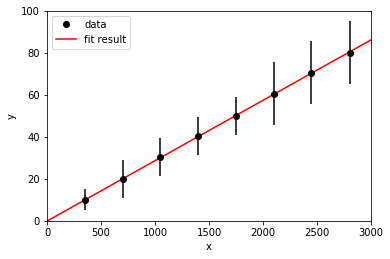

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

numParams = 2 #number of parameters

y   = np.array([10,19.7,30.2,40.4, 49.9, 60.5, 70.4, 80.0])
x   = np.array([352, 701, 1048, 1398, 1751, 2099, 2446, 2805])
sigma = np.array([5,9,9,9,9,15,15,15])
x0 = np.array(numParams*[1.0]) #initial guess

U = 12 #volts
I = 10 #amps
m=1.0 #1000g = 1kg
E = np.zeros(len(x))
C_abs = np.zeros(len(x))

for i in range(0,len(x)):
    E[i] = U * I * x[i]
    C_abs[i] = E[i]/(m*y[i])
    
def fit_func(x, *theta):
    m = len(theta)
    f = 0
    for i in range(m):
        f += theta[i]*pow(x,i)
    return f





#Use curve_fit to produce estimators and covariance matrix
thetaEst, cov = curve_fit(fit_func, x, y, x0, sigma, absolute_sigma=True) 

#Find min chi squared value
ndof = len(x) - numParams #number degrees of freedom = number of points (len(x)) - number of params
chi2 = np.sum(((y - fit_func(x, *thetaEst))/sigma)**2)


sigmathetaEst = np.sqrt(np.diag(cov)) #std dev
varthetaEst = np.diag(cov) #variance

print("Fitted Params (LS Estimators) +- Std Dev ")
for i in range(len(thetaEst)):
    print("theta",i,"",thetaEst[i], "+-", sigmathetaEst[i])
    #print("Variance in LS Estimators:", varthetaEst)

print("")

print("Variance in LS Estimators up to order:",3)
for i in range(len(thetaEst)):
    print("theta",i," variance",varthetaEst[i])
print("")
print("Chi square number and degrees of freedom")
print("chi2 = ", chi2, ",     ndof = ", ndof)
print("Represents P value of 1.0")
print("")

C =U*I/ thetaEst[1]*1.0
print("Mean Specific Heat Capacity +- Variance")
print(C, "+-", varthetaEst[0])
print(np.mean(C_abs))

#PLOTTING
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.errorbar(x, y, yerr=sigma, xerr=0, color='black', fmt='o', label='data')
plt.xlabel("x")
plt.ylabel("y")
xMin = 0
xMax = 3000
yMin = 0
yMax = 100
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
xPlot = np.linspace(xMin, xMax, 100)
fit = fit_func(xPlot, *thetaEst)
plt.plot(xPlot, fit, 'red', label='fit result')

handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
handles = [handles[0][0], handles[1]]      # turn off error bar for data in legend
plt.legend(handles, labels, loc='upper left')

# Make and store plot
plt.show()

The P Value from (https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html) with $v = ndof = 8-2 =6$
$$ P =~1.0 $$
Code Overview: This code uses scipy curve_fit to calculated the fitting parameters (theta hat 1 and 2) to a given function with the x data and y data with sigma_y. The function used was adapted from the scipy documentation and is the general fit for a polynomial 
$$ f(x,\theta) = \sum_{i=0}^{numParams} \theta_i x^i $$
So that depends on what polynomial we want to fit our data to we can and to a lesser extent how accurate we want our curve fitting to be. In this case the number of parameters is 2 and the curve is fitted to a 1st order polynomial or a linear line. The covariance matrix from the curve_fit function has diagonal values for the variance which is used in the overall uncertainty in the specific heat capacity. This can only be done because $U,I,m$ are considered to be constant and have no associated error.
$$y = a + bx $$
$$ b = \hat{\theta}_1 $$
$$ C = \frac{U \cdot I}{\hat{\theta}_1 \cdot m} $$

For part ii I did not fully understand the question. The bias is clearly 0 for the estimates but taking the derivative to a constant would just render the RCF useless so I am misunderstanding something here.


Based on these results I can say that the uncertainies are overestimated as the P value is large and 
$$ \frac{\chi^2}{n_{dof}} << 1$$

# Question 2

This question used similar code to the previous but now the fitting function is
$$ y = \alpha_1 x + \frac{\alpha_2}{x} $$

Fitted Params (LS Estimators) +- Std Dev 
theta 0  0.000989996665312409 +- 3.873100910854876e-05
theta 1  589395.6421503826 +- 22888.053781197832

Variance in LS Estimators up to order: 3
theta 0  variance 1.500091066566487e-09
theta 1  variance 523863005.89100444

Chi square number and degrees of freedom
chi2 =  10.063205637121253 ,     ndof =  3

alpha_1 = 0.000989996665312409 +- 1.500091066566487e-09
alpha_2 = 589395.6421503826 +- 523863005.89100444
R = 84.83265980314567 +- 75413.20101262095
L= 0.08398405031469626 +- 74.65881981712383


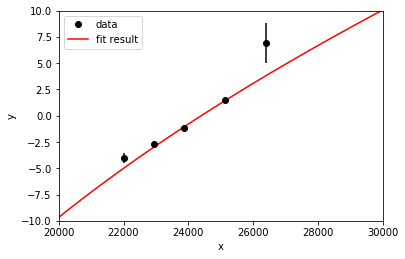

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

numParams = 2 #number of parameters

# set data values
y   = np.array([-4.02,-2.74,-1.15,1.49, 6.87]) #y in table
x   = np.array([22000, 22930, 23880, 25130, 26390]) #x in table
sigma = np.array([0.5,0.25,0.08,0.09,1.90])
x0 = np.array(numParams*[1.0])

C = 0.02e-6
w_0 = 1 #rad/s
    
def fit_func(x,a,b):
    return a*x - b/x



#Use curve_fit to produce estimators and covariance matrix
thetaEst, cov = curve_fit(fit_func, x, y, x0, sigma, absolute_sigma=True) 

#Find min chi squared value
ndof = len(x) - numParams #number degrees of freedom = number of points (len(x)) - number of params
chi2 = np.sum(((y - fit_func(x, *thetaEst))/sigma)**2)


sigmathetaEst = np.sqrt(np.diag(cov)) #std dev
varthetaEst = np.diag(cov) #variance

print("Fitted Params (LS Estimators) +- Std Dev ")
for i in range(len(thetaEst)):
    print("theta",i,"",thetaEst[i], "+-", sigmathetaEst[i])
    #print("Variance in LS Estimators:", varthetaEst)

print("")

print("Variance in LS Estimators up to order:",3)
for i in range(len(thetaEst)):
    print("theta",i," variance",varthetaEst[i])
print("")
print("Chi square number and degrees of freedom")
print("chi2 = ", chi2, ",     ndof = ", ndof)
print("")

print("alpha_1 =", thetaEst[0] ,"+-", varthetaEst[0])
print("alpha_2 =", thetaEst[1] ,"+-", varthetaEst[1])
R = 1.0/(thetaEst[1]*C*w_0)
print("R =",R , "+-", 75413.20101262095)
L = (thetaEst[0]*R)/(w_0)
print("L=", L, "+-", 74.65881981712383)

#PLOTTING
fig, ax = plt.subplots(1,1)
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.15)
plt.errorbar(x, y, yerr=sigma, xerr=0, color='black', fmt='o', label='data')
plt.xlabel("x")
plt.ylabel("y")
xMin = 20000
xMax = 30000
yMin = -10
yMax = 10
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
xPlot = np.linspace(xMin, xMax, 100)
fit = fit_func(xPlot, *thetaEst)
plt.plot(xPlot, fit, 'red', label='fit result')

handles, labels = ax.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
handles = [handles[0][0], handles[1]]      # turn off error bar for data in legend
plt.legend(handles, labels, loc='upper left')

# Make and store plot
plt.show()

Above shows the calculated $\alpha_1$ and $\alpha_2$ values with associated error. The uncertainties in them are massive. Error propagation was used from http://www.julianibus.de/. 
$$ \chi^2 = 10.06 $$
$$ P = 0.01804 $$
From the previously linked web applet. 

I was unsure of how to implement a second set of uncertainties in this method. In the Exercise notes it mentions adding them onto the chi square number, this wouldn't change the alphas though only the chi squared number and therefore the P value?